# Face Recognition using CNN

 # Step1:
 
At the first, you should input the required libraries:

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
import itertools

Using TensorFlow backend.
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

# Step2:

* Load Dataset :

After loading the Dataset you have to normalize every image.

Note: an image is a Uint8 matrix of pixels and for calculation, you need to convert the format of the image to float or double

In [17]:
import numpy as np
import os.path

class IdentityMetadata():
    def __init__(self, base, name, file):
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
y_all = []    


def load_metadata(path):
    metadata = []
    people_type = 0
    num = 0
    for i in sorted(os.listdir(path)):
        for f in sorted(os.listdir(os.path.join(path, i))):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
            
            y_all.append(people_type)
            print(i,y_all[num])
            num+=1
        people_type+=1
            
    return np.array(metadata)

metadata = load_metadata('images_test')

cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
cyw 0
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 1
hgy 

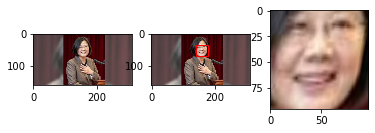

In [18]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

from align import AlignDlib

%matplotlib inline

def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

# Initialize the OpenFace face alignment utility
alignment = AlignDlib('models/landmarks.dat')

# Load an image of Jacques Chirac
jc_orig = load_image(metadata[77].image_path())

# Detect face and return bounding box
bb = alignment.getLargestFaceBoundingBox(jc_orig)

# Transform image using specified face landmark indices and crop image to 96x96
jc_aligned = alignment.align(96, jc_orig, bb, landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

# Show original image
plt.subplot(131)
plt.imshow(jc_orig)

# Show original image with bounding box
plt.subplot(132)
plt.imshow(jc_orig)
plt.gca().add_patch(patches.Rectangle((bb.left(), bb.top()), bb.width(), bb.height(), fill=False, color='red'))

# Show aligned image
plt.subplot(133)
plt.imshow(jc_aligned);

In [19]:
def align_image(img):
    return alignment.align(96, img, alignment.getLargestFaceBoundingBox(img), 
                           landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

embedded = np.zeros((metadata.shape[0], 128))

for i, m in enumerate(metadata):
    try:
        img = load_image(m.image_path())
        img = align_image(img)
        img = (img / 255.).astype(np.float32)
        embedded[i] = nn4_small2_pretrained.predict(np.expand_dims(img, axis=0))[0]
    # scale RGB values to interval [0,1]
    # obtain embedding vector for image
    except:
        print(m.image_path())

In [20]:
x_test = np.zeros((int(metadata.shape[0]/5)+1,96,96,3))
x_train = np.zeros((metadata.shape[0]-x_test.shape[0],96,96,3))


test_num=0
train_num=0
y_test = []
y_train = []

for i, m in enumerate(metadata):
    img = load_image(m.image_path())
    img = align_image(img)
    img = (img / 255.).astype(np.float32)
    if i%5<1:
        x_test[test_num] =(np.expand_dims(img, axis=0))[0]
        y_test.append(y_all[i])
        test_num+=1
    else:
        x_train[train_num] =(np.expand_dims(img, axis=0))[0]
        y_train.append(y_all[i])
        train_num+=1

    # scale RGB values to interval [0,1]
    # obtain embedding vector for image
    print(i,m)


0 images_test\cyw\cyw_0001.jpg
1 images_test\cyw\cyw_0002.jpg
2 images_test\cyw\cyw_0003.jpg
3 images_test\cyw\cyw_0004.jpg
4 images_test\cyw\cyw_0005.jpg
5 images_test\cyw\cyw_0006.jpg
6 images_test\cyw\cyw_0007.jpg
7 images_test\cyw\cyw_0008.jpg
8 images_test\cyw\cyw_0009.jpg
9 images_test\cyw\cyw_0010.jpg
10 images_test\cyw\cyw_0011.jpg
11 images_test\cyw\cyw_0012.jpg
12 images_test\cyw\cyw_0013.jpg
13 images_test\cyw\cyw_0014.jpg
14 images_test\cyw\cyw_0015.jpg
15 images_test\cyw\cyw_0016.jpg
16 images_test\cyw\cyw_0017.jpg
17 images_test\cyw\cyw_0018.jpg
18 images_test\cyw\cyw_0019.jpg
19 images_test\cyw\cyw_0020.jpg
20 images_test\cyw\cyw_0021.jpg
21 images_test\cyw\cyw_0022.jpg
22 images_test\cyw\cyw_0023.jpg
23 images_test\cyw\cyw_0024.jpg
24 images_test\cyw\cyw_0025.jpg
25 images_test\cyw\cyw_0026.jpg
26 images_test\cyw\cyw_0027.jpg
27 images_test\cyw\cyw_0028.jpg
28 images_test\cyw\cyw_0029.jpg
29 images_test\cyw\cyw_0030.jpg
30 images_test\cyw\cyw_0031.jpg
31 images_test\cyw

255 images_test\lqd\lqd_0071.jpg
256 images_test\lqd\lqd_0072.jpg
257 images_test\lqd\lqd_0073.jpg
258 images_test\lqd\lqd_0075.jpg
259 images_test\lqd\lqd_0076.jpg
260 images_test\lqd\lqd_0077.jpg
261 images_test\lqd\lqd_0078.jpg
262 images_test\lqd\lqd_0079.jpg
263 images_test\lqd\lqd_0080.jpg
264 images_test\lqd\lqd_0081.jpg
265 images_test\lqd\lqd_0082.jpg
266 images_test\lqd\lqd_0083.jpg
267 images_test\lqd\lqd_0085.jpg
268 images_test\lqd\lqd_0086.jpg
269 images_test\lqd\lqd_0088.jpg
270 images_test\lqd\lqd_0089.jpg
271 images_test\lqd\lqd_0090.jpg
272 images_test\lqd\lqd_0091.jpg
273 images_test\lqd\lqd_0092.jpg
274 images_test\lqd\lqd_0093.jpg
275 images_test\lqd\lqd_0094.jpg
276 images_test\lqd\lqd_0095.jpg
277 images_test\lqd\lqd_0096.jpg
278 images_test\lqd\lqd_0097.jpg
279 images_test\lqd\lqd_0098.jpg
280 images_test\lqd\lqd_0100.jpg
281 images_test\scy\scy_0001.jpg
282 images_test\scy\scy_0002.jpg
283 images_test\scy\scy_0003.jpg
284 images_test\scy\scy_0004.jpg
285 images

508 images_test\zsz\zsz_0056.jpg
509 images_test\zsz\zsz_0057.jpg
510 images_test\zsz\zsz_0058.jpg
511 images_test\zsz\zsz_0059.jpg
512 images_test\zsz\zsz_0060.jpg
513 images_test\zsz\zsz_0061.jpg
514 images_test\zsz\zsz_0062.jpg
515 images_test\zsz\zsz_0063.jpg
516 images_test\zsz\zsz_0064.jpg
517 images_test\zsz\zsz_0065.jpg
518 images_test\zsz\zsz_0066.jpg
519 images_test\zsz\zsz_0067.jpg
520 images_test\zsz\zsz_0068.jpg
521 images_test\zsz\zsz_0069.jpg
522 images_test\zsz\zsz_0070.jpg
523 images_test\zsz\zsz_0071.jpg
524 images_test\zsz\zsz_0072.jpg
525 images_test\zsz\zsz_0073.jpg
526 images_test\zsz\zsz_0074.jpg
527 images_test\zsz\zsz_0075.jpg
528 images_test\zsz\zsz_0076.jpg
529 images_test\zsz\zsz_0077.jpg
530 images_test\zsz\zsz_0078.jpg
531 images_test\zsz\zsz_0079.jpg
532 images_test\zsz\zsz_0081.jpg
533 images_test\zsz\zsz_0082.jpg
534 images_test\zsz\zsz_0083.jpg
535 images_test\zsz\zsz_0084.jpg
536 images_test\zsz\zsz_0085.jpg
537 images_test\zsz\zsz_0086.jpg
538 images

In [21]:
y_test = np.array(y_test)
y_train = np.array(y_train)

In [22]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(441, 96, 96, 3)
(111, 96, 96, 3)
(441,)
(111,)


# Step 3

Split DataSet : Validation data and Train 

Validation DataSet: this data set is used to minimize overfitting.If the accuracy over the training data set increases, but the accuracy over then validation data set stays the same or decreases, then you're overfitting your neural network and you should stop training.

 * Note: we usually use 30 percent of every dataset as the validation data but Here we only used 5 percent because the number of images in this dataset is very low. 



In [23]:
x_train, x_valid, y_train, y_valid= train_test_split(
    x_train, y_train, test_size=.2, random_state=1234,)

# Step 4

for using the CNN, we need to change The size of images ( The size of images must be the same)

In [24]:
im_rows=96
im_cols=96
batch_size=512
im_shape=(im_rows, im_cols, 3)

#change the size of images
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
x_valid = x_valid.reshape(x_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)
print(y_test[0])

x_train shape: 352
x_test shape: (111,)
(352, 96, 96, 3)
(111, 96, 96, 3)
(352,)
(111,)
0


# Step 5


Build CNN model:
 CNN have 3 main layer: 
 * 1-Convolotional layer 
 * 2- pooling layer  
 * 3- fully connected layer
 
 we could build a new architecture of CNN by changing the number and position of layers.
 

In [25]:

#filters= the depth of output image or kernels

cnn_model= Sequential([
    Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape),
    MaxPooling2D(pool_size=2),
    Flatten(),
    Dense(2024, activation='relu'),
     Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dropout(0.5),
    #20 is the number of outputs
    Dense(20, activation='softmax')  
])

cnn_model.compile(
    loss='sparse_categorical_crossentropy',#'categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

Show the model's parameters.

In [26]:
cnn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 90, 90, 36)        5328      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 45, 45, 36)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 41, 41, 54)        48654     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 20, 20, 54)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 21600)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 2024)              43720424  
_________________________________________________________________
dropout_4 (Dropout)          (None, 2024)             

# Step 6

Train the Model

* Note: You can change the number of epochs


In [27]:
print(x_valid.shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(89, 96, 96, 3)
(352, 96, 96, 3)
(111, 96, 96, 3)
(352,)
(111,)


In [28]:
history=cnn_model.fit(
    np.array(x_train), np.array(y_train), batch_size=512,
    epochs=200, verbose=2,
    validation_data=(np.array(x_valid),np.array(y_valid)),
)

Train on 352 samples, validate on 89 samples
Epoch 1/200
 - 2s - loss: 2.9724 - accuracy: 0.0909 - val_loss: 2.5024 - val_accuracy: 0.1798
Epoch 2/200
 - 0s - loss: 2.5764 - accuracy: 0.1591 - val_loss: 2.1860 - val_accuracy: 0.1798
Epoch 3/200
 - 0s - loss: 2.3562 - accuracy: 0.1562 - val_loss: 1.9823 - val_accuracy: 0.1798
Epoch 4/200
 - 0s - loss: 2.2742 - accuracy: 0.1818 - val_loss: 1.8835 - val_accuracy: 0.2135
Epoch 5/200
 - 0s - loss: 2.2281 - accuracy: 0.1818 - val_loss: 1.8562 - val_accuracy: 0.2360
Epoch 6/200
 - 0s - loss: 2.2964 - accuracy: 0.1960 - val_loss: 1.8567 - val_accuracy: 0.2135
Epoch 7/200
 - 0s - loss: 2.2646 - accuracy: 0.1733 - val_loss: 1.8680 - val_accuracy: 0.1236
Epoch 8/200
 - 0s - loss: 2.2484 - accuracy: 0.1534 - val_loss: 1.8784 - val_accuracy: 0.1236
Epoch 9/200
 - 0s - loss: 2.2575 - accuracy: 0.1705 - val_loss: 1.8965 - val_accuracy: 0.1573
Epoch 10/200
 - 0s - loss: 2.1132 - accuracy: 0.1534 - val_loss: 1.9213 - val_accuracy: 0.2247
Epoch 11/200
 

Epoch 87/200
 - 0s - loss: 0.4485 - accuracy: 0.8551 - val_loss: 0.3772 - val_accuracy: 0.9101
Epoch 88/200
 - 0s - loss: 0.4595 - accuracy: 0.8409 - val_loss: 0.3704 - val_accuracy: 0.9213
Epoch 89/200
 - 0s - loss: 0.3879 - accuracy: 0.8636 - val_loss: 0.3778 - val_accuracy: 0.9101
Epoch 90/200
 - 0s - loss: 0.3452 - accuracy: 0.9119 - val_loss: 0.3960 - val_accuracy: 0.9213
Epoch 91/200
 - 0s - loss: 0.3500 - accuracy: 0.9006 - val_loss: 0.3801 - val_accuracy: 0.8989
Epoch 92/200
 - 0s - loss: 0.3130 - accuracy: 0.9205 - val_loss: 0.3531 - val_accuracy: 0.9213
Epoch 93/200
 - 0s - loss: 0.2849 - accuracy: 0.9375 - val_loss: 0.3258 - val_accuracy: 0.9326
Epoch 94/200
 - 0s - loss: 0.2809 - accuracy: 0.9318 - val_loss: 0.3088 - val_accuracy: 0.9438
Epoch 95/200
 - 0s - loss: 0.2804 - accuracy: 0.9233 - val_loss: 0.3095 - val_accuracy: 0.9326
Epoch 96/200
 - 0s - loss: 0.2623 - accuracy: 0.9205 - val_loss: 0.3277 - val_accuracy: 0.9326
Epoch 97/200
 - 0s - loss: 0.2469 - accuracy: 0.92

Epoch 173/200
 - 0s - loss: 0.0117 - accuracy: 1.0000 - val_loss: 0.3160 - val_accuracy: 0.9438
Epoch 174/200
 - 0s - loss: 0.0145 - accuracy: 0.9972 - val_loss: 0.3270 - val_accuracy: 0.9551
Epoch 175/200
 - 0s - loss: 0.0155 - accuracy: 1.0000 - val_loss: 0.3349 - val_accuracy: 0.9551
Epoch 176/200
 - 0s - loss: 0.0133 - accuracy: 0.9972 - val_loss: 0.3306 - val_accuracy: 0.9551
Epoch 177/200
 - 0s - loss: 0.0148 - accuracy: 0.9972 - val_loss: 0.3044 - val_accuracy: 0.9551
Epoch 178/200
 - 0s - loss: 0.0170 - accuracy: 0.9943 - val_loss: 0.2831 - val_accuracy: 0.9663
Epoch 179/200
 - 0s - loss: 0.0119 - accuracy: 0.9972 - val_loss: 0.2841 - val_accuracy: 0.9663
Epoch 180/200
 - 0s - loss: 0.0149 - accuracy: 1.0000 - val_loss: 0.2890 - val_accuracy: 0.9663
Epoch 181/200
 - 0s - loss: 0.0158 - accuracy: 0.9972 - val_loss: 0.2919 - val_accuracy: 0.9551
Epoch 182/200
 - 0s - loss: 0.0150 - accuracy: 0.9972 - val_loss: 0.2992 - val_accuracy: 0.9551
Epoch 183/200
 - 0s - loss: 0.0094 - acc

Evaluate the test data


In [29]:
scor = cnn_model.evaluate( np.array(x_test),  np.array(y_test), verbose=0)

print('test los {:.4f}'.format(scor[0]))
print('test acc {:.4f}'.format(scor[1]))

test los 0.3325
test acc 0.9369


# Step 7 

plot the result

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


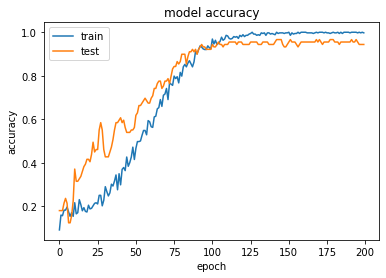

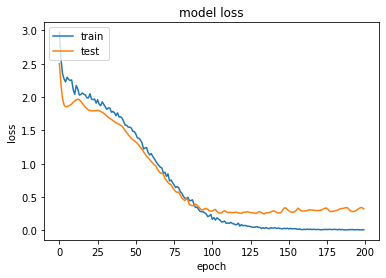

In [30]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# step 8

Plot Confusion Matrix

accuracy : 
0.9369369369369369
Confusion matrix, without normalization
[[20  0  0  0  0  0]
 [ 0 18  0  0  0  1]
 [ 0  3 14  1  0  0]
 [ 0  1  1 17  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 20]]
Confusion matrix, without normalization


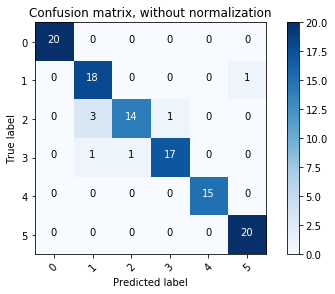

Confusion matrix:
[[20  0  0  0  0  0]
 [ 0 18  0  0  0  1]
 [ 0  3 14  1  0  0]
 [ 0  1  1 17  0  0]
 [ 0  0  0  0 15  0]
 [ 0  0  0  0  0 20]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.82      0.95      0.88        19
           2       0.93      0.78      0.85        18
           3       0.94      0.89      0.92        19
           4       1.00      1.00      1.00        15
           5       0.95      1.00      0.98        20

    accuracy                           0.94       111
   macro avg       0.94      0.94      0.94       111
weighted avg       0.94      0.94      0.94       111



In [34]:
predicted =np.array( cnn_model.predict(x_test))
#print(predicted)
#print(y_test)
ynew = cnn_model.predict_classes(x_test)


Acc=accuracy_score(y_test, ynew)
print("accuracy : ")
print(Acc)
#/tn, fp, fn, tp = confusion_matrix(np.array(y_test), ynew).ravel()
cnf_matrix=confusion_matrix(np.array(y_test), ynew)

y_test1 = np_utils.to_categorical(y_test, 20)



def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()


print('Confusion matrix, without normalization')
print(cnf_matrix)

plt.figure()
plot_confusion_matrix(cnf_matrix[0:6,0:6], classes=[0,1,2,3,4,5],
                      title='Confusion matrix, without normalization')

#plt.figure()
#plot_confusion_matrix(cnf_matrix[11:20,11:20], classes=[10,11,12,13,14,15,16,17,18,19],
#                      title='Confusion matrix, without normalization')

#plt.figure(figsize=(9,9))
#plot_confusion_matrix(cnf_matrix[1:20,1:20], classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
#                      title='Confusion matrix, without normalization')
print("Confusion matrix:\n%s" % confusion_matrix(np.array(y_test), ynew))
print(classification_report(np.array(y_test), ynew))